In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

# Load image

Resolution: (606, 465, 3)
Uncompressed size: 845370 bytes


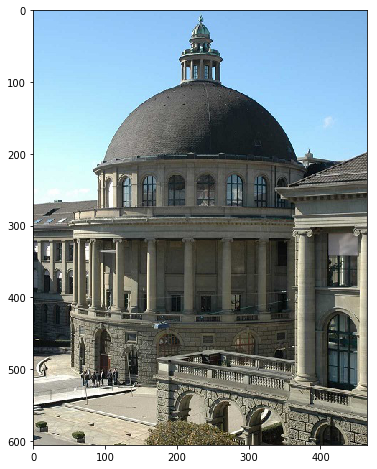

In [2]:
im = np.array(Image.open('eth.jpg'))
plt.figure(figsize=(8, 8))
plt.imshow(im)
print('Resolution:', im.shape)
print('Uncompressed size:', np.product(im.shape), 'bytes')

# K-Means implementation

In [3]:
def kmeans(X, k):
    # Initialize centers as k randomly chosen points
    c = X[np.random.choice(X.shape[0], size=k, replace=False)]
    
    z_old = None
    converged = False
    iteration = 0
    while not converged:
        # Compute assignments
        distances = np.sum((X[:, np.newaxis] - c[np.newaxis, :])**2, axis=2) # Squared
        z = np.argmin(distances, axis=1)
    
        # Compute mean for each cluster
        valid_clusters = []
        for i in range(c.shape[0]):
            points = X[z == i]
            if len(points) > 0:
                c[i] = np.mean(points, axis=0)
                valid_clusters.append(True)
            else:
                valid_clusters.append(False)
            
        # Drop empty clusters
        c = c[valid_clusters]
            
        if z_old is not None and (z == z_old).all():
            converged = True
        z_old = z
        iteration += 1
        
    print('Converged in {} iterations'.format(iteration))
    print('{} clusters dropped'.format(k - c.shape[0]))
    return z, c

In [5]:
def entropy(z):
    # Compute probability distribution over assignments
    k = len(set(z))
    
    probs = []
    for i in range(k):
        probs.append(np.mean(z == i))
    probs = np.array(probs)
    S = -np.sum(probs * np.log2(probs))
    return S

def quantize(im, k):
    X = im.reshape(-1, 3).astype('float32')/255
    z, c = kmeans(X, k)
    reconstruction = c[z].reshape(im.shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(reconstruction)
    plt.imsave('reconstruction.png', reconstruction)
    print('Quantized size: {} bits per pixel'.format(np.log2(c.shape[0])))
    print('Entropy: {} bits per pixel'.format(entropy(z)))
    return z, c

# Experiments

Converged in 45 iterations
0 clusters dropped
Quantized size: 2.0 bits per pixel
Entropy: 1.9660540447330002 bits per pixel


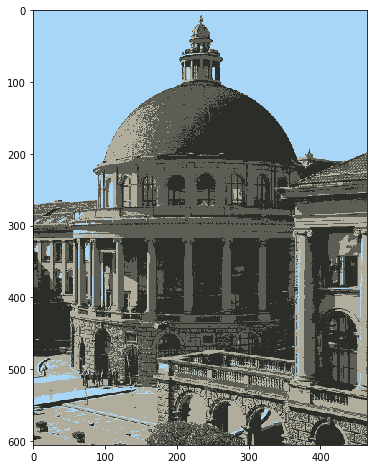

In [6]:
z,c = quantize(im, 4)

In [7]:
c.shape

(4, 3)

In [8]:
z.shape

(281790,)

Converged in 201 iterations
0 clusters dropped
Quantized size: 4.0 bits per pixel
Entropy: 3.871776498838093 bits per pixel


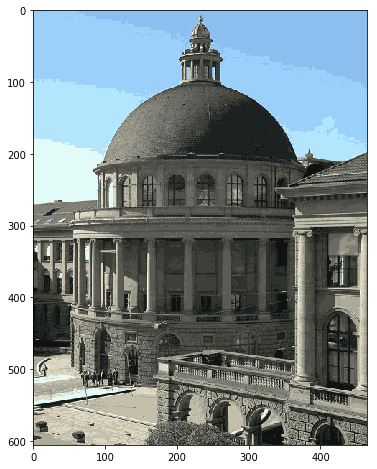

In [6]:
quantize(im, 16)

Converged in 265 iterations
1 clusters dropped
Quantized size: 5.977279923499917 bits per pixel
Entropy: 5.757443986207889 bits per pixel


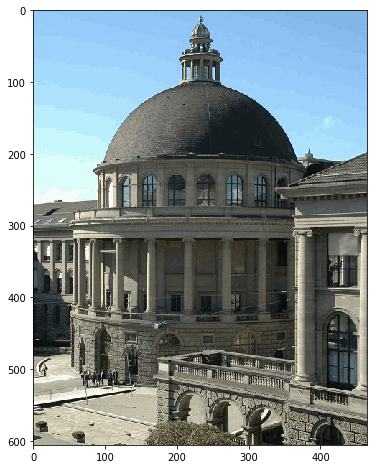

In [7]:
quantize(im, 64)